In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
%matplotlib inline

cars = pd.read_csv('Online_Dataset.csv')

X = cars.iloc[:,3:] 
y = cars.iloc[:,2]

#Convert the column into categorical columns

states=pd.get_dummies(X['Fuel_Type'],drop_first=True)

# Drop the state coulmn
X=X.drop('Fuel_Type',axis=1)

# concat the dummy variables
X=pd.concat([X,states],axis=1)


#Convert the column into categorical columns

states=pd.get_dummies(X['Color'],drop_first=True)

# Drop the state coulmn
X=X.drop('Color',axis=1)

# concat the dummy variables
X=pd.concat([X,states],axis=1)


X=X.drop(['Cylinders',
          'Age_08_04',
          'Parking_Assistant',
          'Power_Steering',
          'Airbag_1',
          'Airbag_2',
          'Mfg_Month',
          'Met_Color',
          'BOVAG_Guarantee',
          'Mfr_Guarantee',
          'Backseat_Divider',
          'Automatic',
          'HP',
          'Boardcomputer',
          'ABS',
          'Powered_Windows',
          'Mistlamps',
          'Tow_Bar',
          'Sport_Model'
         ], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)        

from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=0)

regressor.fit(X_train, y_train)  

y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.8799208229561795

In [43]:
X_test = pd.DataFrame({'Mfg_Year':[2002],
           'KM':[64359],
           'CC':[1600],
           'Doors':[3],
           'Gears':[5],
           'Quarterly_Tax':[85],
           'Weight':[1105],
           'Guarantee_Period':[3],
           'Airco':[1],
           'Automatic_airco':[0],
           'CD_Player':[1],
           'Central_Lock':[1],
           'Radio':[0],
           'Metallic_Rim':[0],
           'Radio_cassette':[0],
           'Diesel':[0],
           'Petrol':[1],
           'Black':[0],
           'Blue':[0],
           'Green':[0],
           'Grey':[1],
           'Red':[0],
           'Silver':[0],
           'Violet':[0],
           'White':[0],
           'Yellow':[0]})

y_pred = regressor.predict(X_test)
y_pred
#16530

array([16947.70374086])

In [46]:
cars = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
cars

,Actual,Predicted
479,8250,8886.200035
434,8950,8748.117442
247,11895,11058.732623
784,6450,7214.529939
27,13950,13905.105527
...,...,...
748,10500,7524.275076
317,9500,9655.934935
1011,7950,7827.372954
627,11500,9540.573746


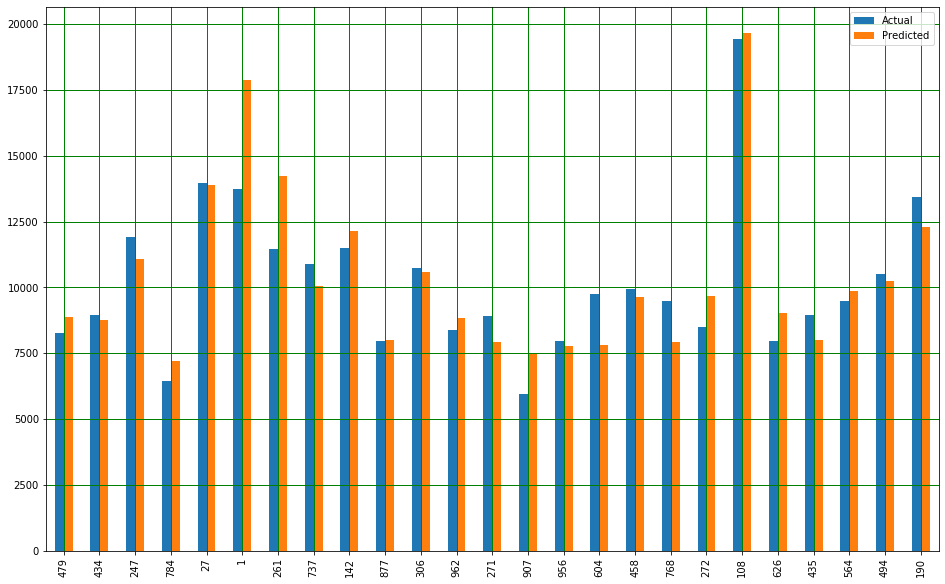

In [47]:
df1 = cars.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='1', color='green')
plt.grid(which='minor', linestyle=':', linewidth='1', color='black')
plt.show()

In [48]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 875.5165084731068
Mean Squared Error: 1594194.9200320828
Root Mean Squared Error: 1262.6143195893521


In [57]:
import pandas as pd  
import numpy as np  
from sklearn.model_selection import train_test_split 

cars = pd.read_csv('Online_Dataset.csv')


X = cars.iloc[:,3:] 
y = cars.iloc[:,2]

#Convert the column into categorical columns

states=pd.get_dummies(X['Fuel_Type'],drop_first=True)

# Drop the state coulmn
X=X.drop('Fuel_Type',axis=1)

# concat the dummy variables
X=pd.concat([X,states],axis=1)


#Convert the column into categorical columns

states=pd.get_dummies(X['Color'],drop_first=True)

# Drop the state coulmn
X=X.drop('Color',axis=1)

# concat the dummy variables
X=pd.concat([X,states],axis=1)


X=X.drop(['Cylinders',
          'Age_08_04',
          'Parking_Assistant',
          'Power_Steering',
          'Airbag_1',
          'Airbag_2',
          'Mfg_Month',
          'Met_Color',
          'BOVAG_Guarantee',
          'Mfr_Guarantee',
          'Backseat_Divider',
          'Automatic',
          'HP',
          'Boardcomputer',
          'ABS',
          'Powered_Windows',
          'Mistlamps',
          'Tow_Bar',
          'Sport_Model'
         ], axis=1)

#Get zcores for non bitmap indexed fields
Z_Fields = X.iloc[:,0:8] 

cols = list(Z_Fields.columns)

for col in cols:
        X[col] = (Z_Fields[col] - Z_Fields[col].mean())/Z_Fields[col].std(ddof=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)        
        
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=0)
regressor.fit(X_train, y_train) 

y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.8809405775466751